# Session 0: Setup and 'Hello World'

This notebook covers the setup process for the tutorials that follow. The setup is then tested with a simple example

- Required Software
- Installing Python and the Jupyter Notebook
- Installing and configuring Veneer, options
- Installing veneer-py
- Starting Jupyter Notebook
- Suggested folder structure
- Familiarisation with Notebook, plotting, etc
- Connecting to Veneer from Python - querying the network


## Required Software

To work through these tutorials, you will need

* **eWater Source** (the tutorials are tested with the 4.1 Public Release),
* **Python and related scientific computing packages** (I recommend installing Anaconda Python),
* **Veneer** plugin for Source,
* **veneer-py** Python package.

The later tutorials use some additional components:

* **Additional Python packages related to spatial data**,
* **PEST**

I'll assume that you have eWater Source installed. Everything else is described, below.

You should be able to install and run everything without administatrive privileges. However, if you want to run examples where Source is running remotely, on a different machine to Python, then you will need admin privileges to register the Veneer service on the machine running Source.

## Installing a Scientific Python Environment

It is easy to install standard Python, but the 'official' distribution of Python doesn't include the libraries/packages typically used in scientific computing and data analysis environments.

[Anaconda Python](https://www.continuum.io/downloads) is a third party distribution of Python that specific targets science and data analysis users. It includes most of additional packages that we'll need (except veneer-py of course!). Using Anaconda saves a good deal of setup work. Anaconda doesn't include the key geospatial packages, but they can be installed as needed.

Install Anaconda from [https://www.continuum.io/downloads](https://www.continuum.io/downloads). Download the version that relates to Python 3 (Currently Python 3.5). _Python is currently at major version 3, but the incompatible Python 2 is still popular. For this reason, Anaconda currently separate distributions for Python 2 (2.7) and Python 3 (3.5)._ These tutorials, and the veneer-py package, are tested with Python 3.5.

You should be able to accept the defaults when installing Anaconda. **Note** If you have another Python environment (eg as part of ArcGIS) consider carefully whether Anaconda should register itself as the default Python.

One of the main capabilities that Anaconda installs is the Jupyter Notebook system (still referred to as the IPython Notebook in some material). This is a browser based environment for creating and running scripts, capturing documentation and visualising outputs.

## Installing and Configuring Veneer

Veneer is a Source plugin (ie a DLL). The latest release is available at [https://github.com/flowmatters/veneer/releases](https://github.com/flowmatters/veneer/releases). You need to download the version appropriate to your version of Source. (At the time of writing, the latest versions of Veneer work with 3.8.22 and up. Older versions of Veneer are available for older versions of Source, but the old versions miss certain features needed for these tutorials.)

*Notes:*

* These tutorials have been tested in the Source 4.1.1 public release.
* Recent versions of Source include Veneer as a community plugin. In most cases this version will be fine and will remove the need to separately download a Veneer release. However the Source-bundled version of Veneer will only be as up to date as the version of Source itself. A more recent version may be available!


### Download and unzip
From [https://github.com/flowmatters/veneer/releases](https://github.com/flowmatters/veneer/releases), download the Veneer release for your version of Source. Unzip it to a convenient location.

If you only plan to use Veneer from the main Windows application version of Source, you can place the unzipped files anywhere. However, if you plan to use the command line version of Veneer, it will require access to all of Source's other DLL and EXE files. In this case, you can either place the unzipped Veneer into the main Source folder (eg `C:\Program Files\eWater\Source 4.1.0.YYYY`), OR copy all of the files from the main Source folder to the location where you unzipped Veneer.

### Load the plugin

1. Start eWater Source as per usual (ie start the main Windows version, not the command line)
2. From the Tools menu, select Plugin Manager
![Tools Menu](Images/Setup/ToolsMenu.PNG)
![Plugin Manager before loading plugin](Images/Setup/PluginManager_Blank.PNG)
3. Load the plugin by navigating to the directory where you unzipped Veneer and selecting `FlowMatters.Source.Veneer.dll`.
![Loading the Plugin](Images/Setup/LoadingPlugin.PNG)
4. Restart Source, as directed. (You can safely ignore the warning about IronPython. It's there)
![Need to restart Source](Images/Setup/PluginLoaded_NeedToRestart.PNG)

### Start the plugin

You need to load a Source project before you can start Veneer:

1. Load your favourite Source project
2. From the Tools menu, select Web Server Monitoring (should be the last in the list)
![Veneer in Tools Menu](Images/Setup/WebServerMonitoringInToolsMenu.PNG)
3. The Web Server Monitoring window should appear - this is the only Veneer-related thing you'll see in Source.
![Main Veneer Window](Images/Setup/ServerRunning.PNG)
4. If the window is reporting `Started Source RESTful Service on port: 9876` then Veneer is working. You can confirm it is working by going to your web browser by visiting the following url: [http://localhost:9876/network](http://localhost:9876/network).
5. After visiting the URL, you should see a log message in the Veneer window in Source `Requested network`. Your browser is probably showing a jumble of text (in JSON format). This represents the node link network of your current Source model. Once we've installed veneer-py, we'll request the network from Python and see that Python can interpret the data and let us further query the network.

### Troubleshooting

A few things can go wrong at this point.

* **Source reports that the plugin is 'blocked', OR No 'Web Server Monitoring' option in Tools menu, or window doesn't appear when menu item is selected.** This indicates that the Veneer plugin has not been successfully loaded by Source. This might be because the selected version of Veneer doesn't match the version of Source. The other likely possibility is that one of the DLLs that Veneer uses is being blocked by Windows, because it has come from an untrusted network location. You can check this, and unblock any blocked DLLs, by navigating to the DLL in Windows Explorer, right clicking on the DLL and selecting Properties. If the DLL is blocked, then the properties Window should have a message to this effect, along with an Unblock button. Source will automatically Unblock the plugin itself (`FlowMatters.Source.Veneer.dll`), but you may need to do so manually for the other DLLs in the Veneer directory:
![Properties of a DLL](Images/Setup/DLL_Properties.PNG)
* **Web Server Monitoring window opens, but logs message that it `COULD NOT START VENEER...`.** This indicates a permissions issue is blocking you from starting Veneer. Veneer communicates to other software over network ports - even when working locally - and it does this by running a server on a designated port. Now, if another program is already using the default port (9876), then Veneer will try the next port (9877) and so on until a free port is available. This means if you start two copies of Source concurrently and use Veneer in both, they will register themselves on different ports. Veneer will report an error if it is blocked from using a port for some reason _other_ than the port being in use. The most common reason to get this error at start up is if you have previously registered to allow remote connections on this port and you subsequently try to run a local-only connection (see below). If this is the case, you should be able to check the `Allow Remote Connections` box then click the `Start` button to try starting the server.

### Veneer options

The Web Server Monitoring window provides control to Start, Stop and Restart the server, and to Clear the log messages. There are also three options that control how Veneer operates:


* **Port** specifies which network port to listen to. This defaults to 9876 and if this port is already occupied, Veneer increments the port number to 9877 and tries again. Veneer keeps incrementing the port until it finds one unoccupied
* **Allow Remote Connections** instructs Veneer to accept connections from other computers. By default, Veneer will only accept connections from programs (Web browsers, Python, etc) running on the same PC. Remote connections are useful for parallel processing and other use cases. For remote connections to succeed, you must first register a http endpoint with Windows. You may also need to make firewall adjustments. You will need administrative privileges to do either of these steps. Instructions are provided at [https://github.com/flowmatters/veneer](https://github.com/flowmatters/veneer).
* **Allow Scripts** enables Veneer to accept Iron Python scripts that run _within_ Source and operate directly on the Source internal objects. This option is used for most scenario modification tasks, but isn't always necessary for simple batch runs and the like. This option is discussed in more detail in relevant tutorials.

## Install veneer-py

veneer-py is a Python package. The `pip` tool, which was installed with Anaconda, can be used to download and install veneer-py.

You can run `pip` from a Windows Command Prompt. Note, if you have more than one Python environment installed (eg because you use Python with ArcGIS), then you should use the Anaconda Command Prompt, which was installed with Anaconda. From the command prompt, run the folllowing command

```
pip install https://github.com/flowmatters/veneer-py/archive/master.zip
```

With veneer-py installed, you can now use it, from Python, to communicate with Source and Veneer.

### Upgrading veneer-py

veneer-py is regularly updated. At this stage, there is no explicit version number - only the latest revision of the master branch of the git repository. To upgrade to the latest version, you first uninstall veneer-py then install the latest:

```
pip uninstall veneer-py
pip install https://github.com/flowmatters/veneer-py/archive/master.zip
```


## Installing Spatial Packages

There are a number of Python packages for spatial analysis and these can be very useful when using veneer-py - particularly with spatial models.

Historically, installing some of these packages on Windows has been tricky and a number of non-standard approaches have emerged.

### Installation via `conda`

One option, that worked for many people, uses the `conda` tool, supplied with Anaconda:

```
conda install -c conda-forge shapely
conda install -c conda-forge fiona
conda install -c conda-forge rasterio
pip install geopandas rasterstats
```

This will install the named packages (`fiona`, `shapely`, `rasterio`, `geopandas`, `rasterstats`) as well as a number of notable dependencies, including `gdal`.

### Alternative via unofficial wheels (`.whl` files):

There is a repository of prebuilt scientific Python packages for Windows, maintained by Christoph Gohlke of Universiry of California, Irvine at [http://www.lfd.uci.edu/~gohlke/pythonlibs/][http://www.lfd.uci.edu/~gohlke/pythonlibs/]. For users that are unsuccessful with the `conda` installation, using these packages should work.

1. Browse to [http://www.lfd.uci.edu/~gohlke/pythonlibs/][http://www.lfd.uci.edu/~gohlke/pythonlibs/]
2. For each of the following packages, download the version appropriate to your version of Python and system Architecture:
  * GDAL,
  * shapely,
  * fiona,
  * rasterio
  * pyproj
  * So, for example, if you have installed Anaconda with a 64-bit version of Python 3.6, you would (at time of writing) download `Shapely-1.5.17-cp36-cp36m-win_amd64.whl`
3. Run a command prompt and navigate to the directory where you saved each of the above packages.
4. Run `pip install <fn> ` for each `.whl` file downloaded
5. Run `pip install geopandas rasterstats` to install remaining packages


## Starting Jupyter Notebook

The Jupyter Notebook runs as a local server application, hosting notebooks - interactive documents featuring code, data and documentation. Like Veneer, the Notebook runs on http, which, by default, is only available from your local machine.

Anaconda installs Jupyter Notebook in your start menu. You can use this option, but it will, by default, start the notebook server in your Windows home directory - and you will only be able to load notebooks store within this directory (including subdirectories). If you want to store notebooks in other directories, the notebook server needs to be started in those directories. You can modify the shortcut installed by Anaconda, but I typically just start the notebook server from the Windows Command Prompt (or the Anaconda Command Prompt). For example:

```
cd \work\source_projects
jupyter notebook
```

Regardless of whether you use the start menu or the command prompt, the server will start and then a new tab will open in your we browser, pointing to the notebook server (on port 8888 by default). If you close that tab (or want to use a different browser), the default notebook server should be at [http://localhost:8888](http://localhost:8888). However, like Veneer, if the notebook server finds its default port occupied, it will increment the port number, to 8889 and try again, and so on.

**Note:** The Jupyter Notebook is sometimes still referred to as the IPython Notebook. IPython was the original project, Jupyter is the evolution of that project into a multi-language notebook environment. 

## Suggested folder structure

When working with Veneer and veneer-py, its common to create a number of notebooks. Some will be short experiments, others will capture important logic that you want to be able to repeat. Depending on your needs, notebooks may be closely coupled to a particular Source model, or the notebooks may be more generic and work with a range of Source models.

Personally, most of my notebooks relate to a single Source model and as a result, I keep the notebooks in the same directory as the model file (`.rsproj`). This way, I can easily find the notebooks that I've used with a particular model, and the 




## Exploring the Notebook

Notebooks are _interactive_ documents.

The documents are made of cells. This cell is a 'Markdown' cell - used for documentation.

Code cells hold source code - Python in these tutorials. You can _run_ a code cell to execute the code and to see any results.

There are numerous tutorials available for the notebook (though many focus on particular domains). If you are reading these instructions in a notebook server, you can run the following two code cells using the notebook controls (eg the Run button on the toolbar). Alternatively, start a new notebook and past the text from the code cell into a code cell in the notebook, then run.

If you haven't yet installed Anaconda or started the notebook server, you can try it out online at [https://try.jupyter.org/](https://try.jupyter.org/).


<IPython.core.display.Javascript object>


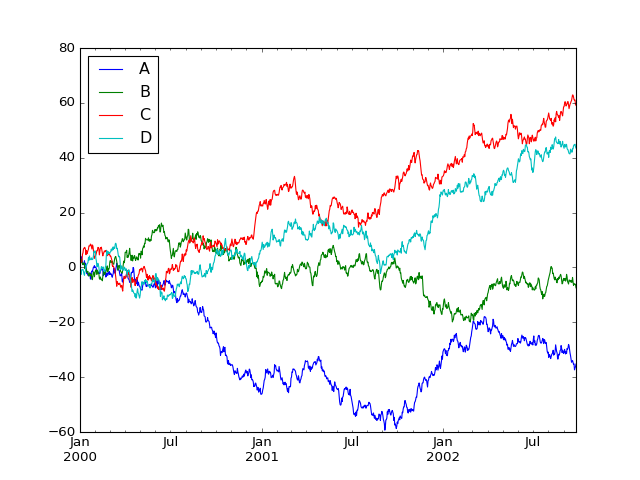

In [7]:
#### This is a CODE cell.
#### To Run, click on the cell then click the Play button in the toolbar, or the menu Cell|Run, or press Shift+Enter 
%matplotlib notebook

import pandas as pd
import numpy as np
import matplotlib

from matplotlib import pyplot as plt

ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
ts = ts.cumsum()

df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index,
                  columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(); plt.legend(loc='best')

In [8]:
### This is also a CODE cell,
### Run to see a result
m = 50
a = 9.8
F = m*a
F

490.00000000000006

## Connecting to Veneer from Python

Now that we've installed, Anaconda, Veneer, veneer-py and some related packages.

We need to make the veneer-py package available to the current notebook using an `import` statement.

**Note:** Each of the following code cells need to be run in order.

In [12]:
import veneer

If there is no error after an import statement, you can assume that it worked - it imported something of that name!

Now, create a Veneer client to talk to the server running within Source. (So, you'll need to have Source running with the Web Server Monitoring open)

In [13]:
v = veneer.Veneer()

You can now use the `v` symbol to refer to the connection to Source/Veneer. This will be connecting on the default port of 9876. If the web server is running on a different port, you can specify it when setting up the client:

```
v = veneer.Veneer(port=9877)
```

Now, you can ask the client to interact with Source. We'll test everything is working by querying the network (as we did with the browser)

In [14]:
network = v.network()

*** /network ***


You don't see the data that's returned, but you can query it...

In [15]:
all_nodes = network['features'].find_by_feature_type('node')

In [16]:
all_nodes._unique_values('name')

{'node #0',
 'node #1',
 'node #10',
 'node #2',
 'node #3',
 'node #4',
 'node #5',
 'node #6',
 'node #7',
 'node #8',
 'node #9'}

## Suggested Reading

The following tutorials are focussed on Veneer and veneer-py - the tutorials are not intended as training in Python or Python Data Analysis.

My favourite book on data analysis in Python is [Python for Data Analysis, by Wes McKinney](http://shop.oreilly.com/product/0636920023784.do). It's now a few years old, but its still quite relevant for the key concepts and  packages (pandas, numpy and the notebook).

If you are familiar with R, there are various resources to support the migration from R to Python, including [this blog post](http://blog.yhat.com/posts/moving-from-r-to-python.html).

The Python Data Analysis Library ([pandas](http://pandas.pydata.org/)) is probably the key library you'll use with veneer-py. There are a number of tutorials for pandas at [http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html](http://pandas.pydata.org/pandas-docs/version/0.18.1/tutorials.html).

There are a great many tutorials and books on Python itself. [Think Python](http://greenteapress.com/wp/think-python-2e/) is a freely available e-book written from a science perspective.
